In [11]:
#Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#File to load
listingsAustin = "Resources/listings.csv"

#Read the csv file
listingsAustin_df = pd.read_csv(listingsAustin, low_memory = False)

#Obtaining some values from the data frame
listingsAustin_df["last_review"] = pd.to_datetime(listingsAustin_df["last_review"])
listingsAustin_df = listingsAustin_df.sort_values('last_review',ascending = False)
listingsAustin_df["price"] = listingsAustin_df["price"].str.replace("$","").str.replace(",","").astype(float)


In [12]:
# Calculations

mean_price_city_Austin = round(listingsAustin_df["price"].mean(),2)

avg_availability_Austin = listingsAustin_df["availability_365"].mean()

bookings_Austin = listingsAustin_df["id"].value_counts().sum()

#Grouping /organising data
price_by_roomtype = listingsAustin_df.groupby(["room_type"])["price"].mean()
price_by_location = listingsAustin_df.groupby(["neighbourhood"])["price"].mean().reset_index().sort_values("price",ascending=False)
price_by_location_room_type = listingsAustin_df.groupby(["neighbourhood","room_type"])["price"].mean()
avg_review_location = listingsAustin_df.groupby(["neighbourhood"])["review_scores_rating"].mean()
avg_count_room_type = listingsAustin_df.groupby(["neighbourhood"])["room_type"].count()
total_availability = listingsAustin_df.groupby(["neighbourhood","room_type"])["availability_365"].sum()
total_availability_mean = listingsAustin_df.groupby(["room_type"])["availability_365"].mean()
room_type_group = listingsAustin_df.groupby(["room_type"])
total_availability_365 = room_type_group["availability_365"].sum()
total_availability_365 = room_type_group["availability_365"].mean()

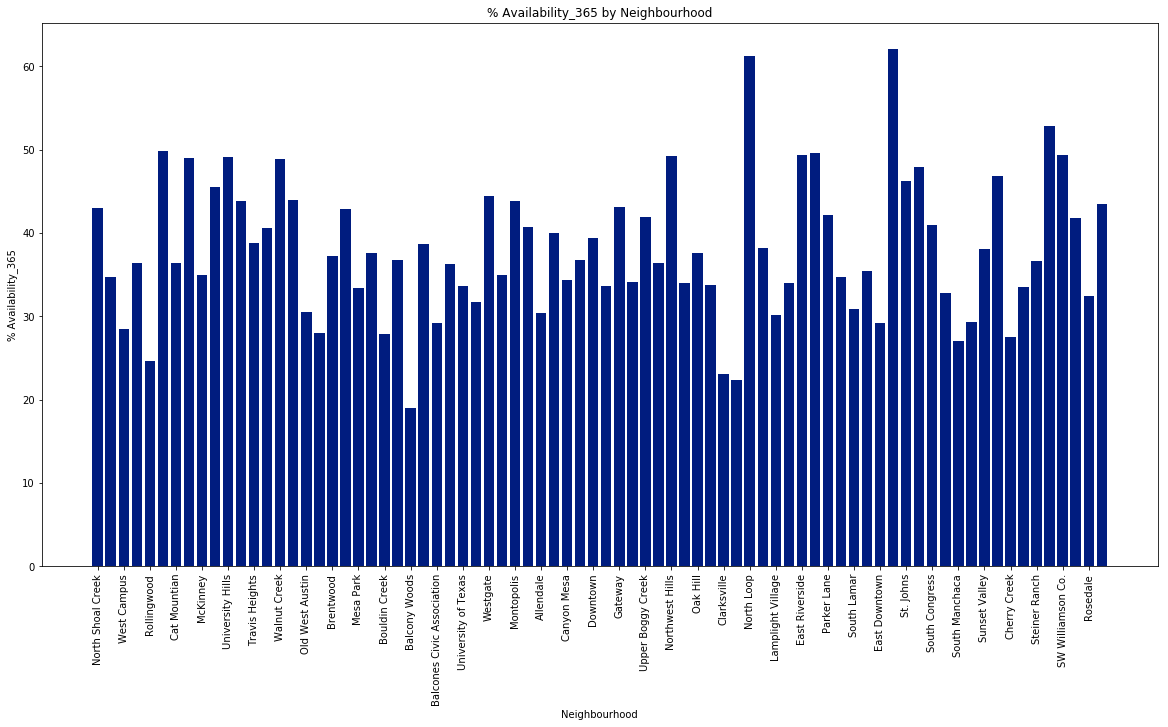

<Figure size 1440x720 with 0 Axes>

In [13]:
avg_availability_type = listingsAustin_df[["neighbourhood","availability_365"]].groupby("neighbourhood")["availability_365"].mean()
Per_avg_availability_type = avg_availability_type*100/365
#clean the neighborhood data
remove_nan_vals = [True if type(item) == str else False for item in listingsAustin_df["neighbourhood"]]
listingsAustin_df = listingsAustin_df.loc[remove_nan_vals,:]

# Create the ticks for our bar chart's x axis
xticks = [0,77]

x_labels = list(set(listingsAustin_df["neighbourhood"]))

plt.bar(listingsAustin_df["neighbourhood"].unique(), Per_avg_availability_type)
plt.xticks(np.arange(min(xticks), max(xticks)+1, 2), x_labels, rotation = 90)
plt.title("% Availability_365 by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("% Availability_365")
plt.rcParams["figure.figsize"] = (20,10)
import matplotlib
matplotlib.style.use("seaborn-dark-palette")
plt.show()
plt.savefig("Images/%AvailabilitybyNeighbourhood.png",bbox_inches = "tight")


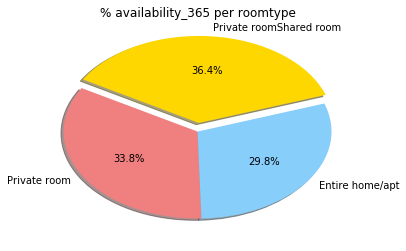

In [9]:
# Building Pie Chart
labels = ["Private room", "Entire home/apt", "Private roomShared room"]
explode = (0.0, 0.0, 0.1)
colors = ["lightcoral", "lightskyblue", "gold"]
plt.pie(total_availability_365,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% availability_365 per roomtype")
plt.savefig("Image% availability_365 per roomtype")

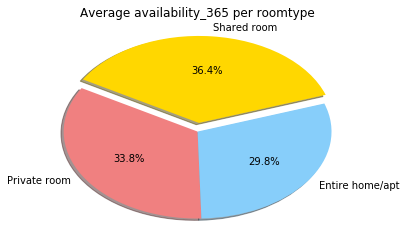

In [8]:
# Building Pie Chart
labels = ["Private room", "Entire home/apt", "Shared room"]
explode = (0.0, 0.0, 0.1)
colors = ["lightcoral", "lightskyblue", "gold"]
plt.pie(total_availability_mean,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("Average availability_365 per roomtype")
plt.savefig("Image Average availability_365 per roomtype")